## Students Performance Dataset

The sourse of this dataset from kaggle :https://www.kaggle.com/spscientist/students-performance-in-exams
        

I will explore this dataset and try to understand the structure of it, to find if there are some factors 
that may effects the total score of the student, factors such as the parents background, test preparation, and having lunch.


#### Dictionary :
  <b>gender > Female or Male</b><br>
   <b>race/ethnicity > groups of stuends classed according to common racial</b><br>
   <b>parental level of education > parents education</b><br>
   <b>lunch > if they have lunch before test (standart lunch or free lunch)</b><br>
   <b>test preparation course > completed (yes ) none (no)</b><br>
   <b>1 math 2 reading 3 writin > scores</b><br>

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
students_perf=pd.read_csv('StudentsPerformance.csv')
# Explore the data
# print the fisrt row just to see what our data look like
students_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# lets see how many observations we have and how many columns
students_perf.shape

(1000, 8)

In [4]:
# we want to know the type of this 8 columns 
students_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# It will helpful to create new columns :

"""> Lets creat column that show the total average score of the three subject, 
it will help then to assign grade ( A , B , C, ..) to each average score"""


students_perf['Total']=students_perf['math score']+students_perf['reading score']+students_perf['writing score']
students_perf['Total']=students_perf['Total']/3



In [6]:
"""> create grade, we use function that will work on total column
and apply it the result to grade column"""

def convert_to_grade(x):
    if x>=90:
        x='A'
    elif x>=80:
        x='B'
    elif x>=70:
        x='C'
    elif x>=60:
        x='D'
    else :
        x='F'
    return x

In [7]:
students_perf['Grade']=students_perf['Total'].apply(convert_to_grade)
students_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C


In [8]:
# lets descirbe() summary statistics of this dataset
students_perf.describe()

,math score,reading score,writing score,Total
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [9]:
# we want to know how many males and females our data have
students_perf['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
# say we want to know the mean of each gender per each subject 
# math subject
students_perf.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [11]:
# reading subject
students_perf.groupby('gender')['reading score'].mean()

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

In [12]:
# writing subject
students_perf.groupby('gender')['writing score'].mean()

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

In [13]:
# say we want to know for (parent education) how many males&females are in each category 
students_perf.groupby(['parental level of education', 'gender']).gender.count()

parental level of education  gender
associate's degree           female    116
                             male      106
bachelor's degree            female     63
                             male       55
high school                  female     94
                             male      102
master's degree              female     36
                             male       23
some college                 female    118
                             male      108
some high school             female     91
                             male       88
Name: gender, dtype: int64

In [14]:
# we want to view students how complete the course preparation and had lunch 
Students_lunch_pre = students_perf[(students_perf['lunch'] == 'standard') & (students_perf['test preparation course'] == 'completed')]
Students_lunch_pre

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Grade
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
13,male,group A,some college,standard,completed,78,72,70,73.333333,C
35,male,group E,associate's degree,standard,completed,81,81,79,80.333333,B
46,female,group A,associate's degree,standard,completed,55,65,62,60.666667,D
...,...,...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91,85.333333,B
987,male,group E,some high school,standard,completed,81,75,76,77.333333,C
991,female,group B,some high school,standard,completed,65,82,78,75.000000,C
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,A


In [15]:
"""say we are making an assumption that who ever took test preparation course 
are having a high avg score at the subject"""

math_pre=students_perf.groupby('test preparation course')['math score'].mean()
math_pre

test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64

In [16]:
reading_pre=students_perf.groupby('test preparation course')['reading score'].mean()
reading_pre

test preparation course
completed    73.893855
none         66.534268
Name: reading score, dtype: float64

In [17]:
writing_pre=students_perf.groupby('test preparation course')['writing score'].mean()
writing_pre

test preparation course
completed    74.418994
none         64.504673
Name: writing score, dtype: float64

In [18]:
# So, can find out if there are heros with high scores but they did not take test preparation course ?

hero_students=students_perf[(students_perf['Grade'] == 'A') & (students_perf['test preparation course'] == 'none')]
hero_students


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Grade
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
106,female,group D,master's degree,standard,none,87,100,100,95.666667,A
263,female,group E,high school,standard,none,99,93,90,94.000000,A
334,female,group C,bachelor's degree,standard,none,83,93,95,90.333333,A
451,female,group E,some college,standard,none,100,92,97,96.333333,A
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000,A
571,male,group A,bachelor's degree,standard,none,91,96,92,93.000000,A
580,female,group D,some high school,standard,none,81,97,96,91.333333,A
712,female,group D,some college,standard,none,98,100,99,99.000000,A
755,female,group E,associate's degree,standard,none,84,95,92,90.333333,A


In [19]:
""" we want to know the precentage of those who really could make it to 'A' without preparation course!!
    they might have a special method to study! or they actually attend all classes so no need 
    for preparation course""" 

total_none_pre=students_perf['test preparation course'].count()
total_none_precentage=(len(hero_students)/total_none_pre)*100
total_none_precentage

1.7000000000000002

In [20]:
""" Another assumption, are students who had different type of lunch 
are having a high avg score at the subject"""

lunch_avg_math=students_perf.groupby('lunch')['math score'].mean()
lunch_avg_math

lunch
free/reduced    58.921127
standard        70.034109
Name: math score, dtype: float64

In [21]:
lunch_avg_read=students_perf.groupby('lunch')['reading score'].mean()
lunch_avg_read

lunch
free/reduced    64.653521
standard        71.654264
Name: reading score, dtype: float64

In [22]:
lunch_avg_writing=students_perf.groupby('lunch')['writing score'].mean()
lunch_avg_writing

lunch
free/reduced    63.022535
standard        70.823256
Name: writing score, dtype: float64

In [23]:
# lets find what are the grades of each parent level of education 
students_perf.groupby(['parental level of education', 'Grade']).Grade.count()

parental level of education  Grade
associate's degree           A        16
                             B        35
                             C        59
                             D        53
                             F        59
bachelor's degree            A        13
                             B        18
                             C        35
                             D        31
                             F        21
high school                  A         2
                             B        18
                             C        45
                             D        55
                             F        76
master's degree              A         6
                             B        14
                             C        16
                             D        13
                             F        10
some college                 A        11
                             B        35
                             C        62
                      

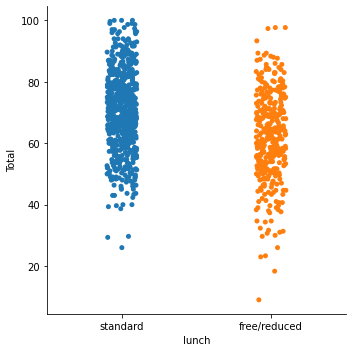

In [24]:
sns.catplot(x='lunch', y='Total', data=students_perf)

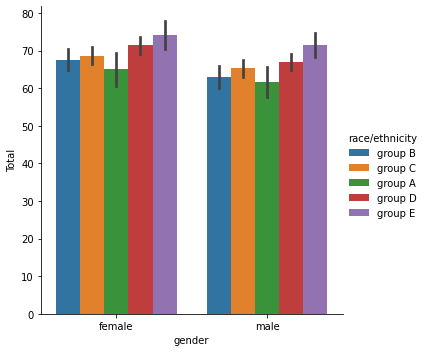

In [25]:
sns.catplot(x='gender', y='Total', hue='race/ethnicity', kind='bar', data=students_perf)

## Conclusion :

#### 1- Students who attemp test preparation course, have high score in avreage.
#### 2- Parents level of education may effects the student score, data shows most (F Grade) for students with parents of limited education background (high school,associate's degree).
#### 3- Paying for lunch meal, benefits the students, data shows who have standard meal have high score in average than who only have free lunch meal.
#### 4- Group of ethnicity A, males and females, shows the less total average of scores in the bar plot, i would assume that the language used in the classes is not their first language, so this can effect their performance.